In [2]:
import pandas as pd

# Load the data
df_train = pd.read_csv('../data/climate/AMOCdata.csv')
df_test = pd.read_csv('../data/climate/AMOCdata.csv')

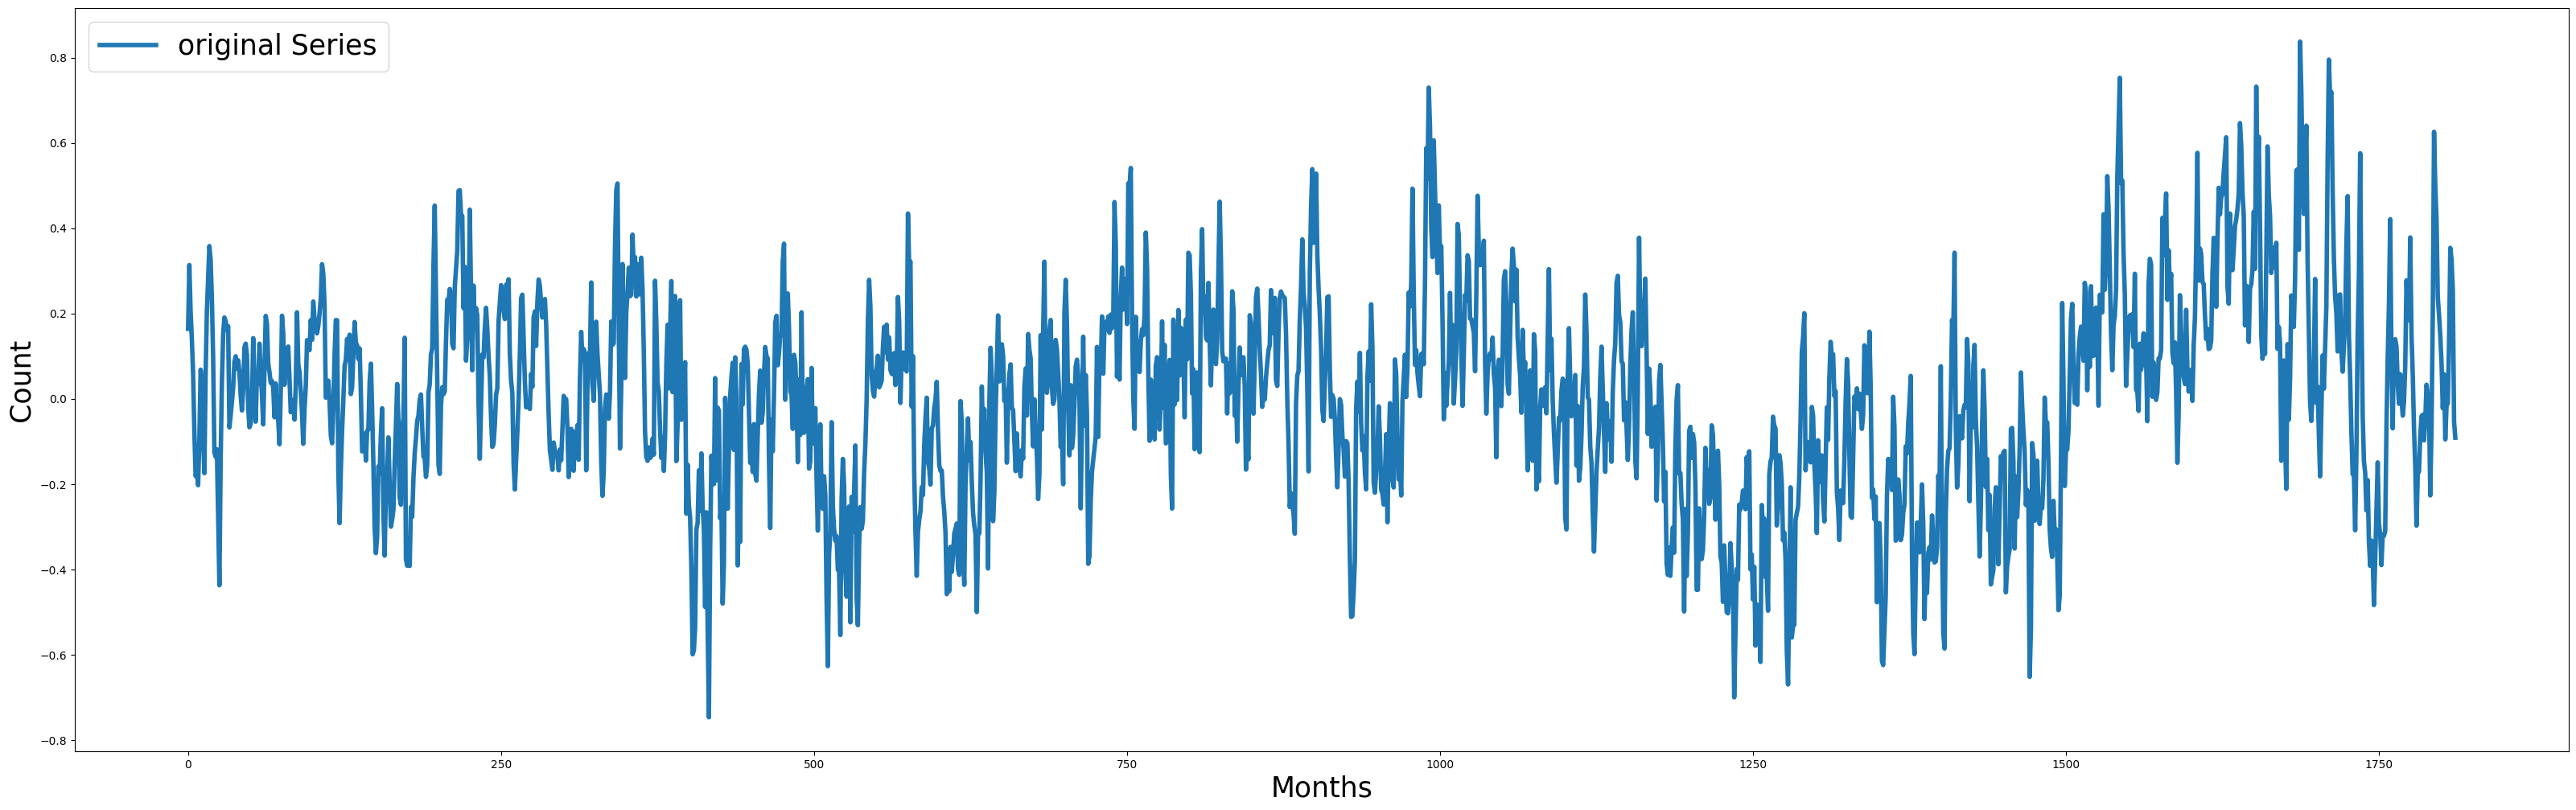

In [3]:
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(12)
plt.plot(df['AMOC0'], linewidth = 4, label = "original Series")
plt.legend(fontsize=25)
plt.xlabel('Months', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.show()

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from mango import scheduler, Tuner

# def arima_objective_function(args_list, data_train, data_val):

#     params_evaluated = []
#     train_loss = []
#     val_loss = []
#     val_loss_int = []
    
#     for params in args_list:
#         try:
#             p,d,q = params['p'],params['d'], params['q']
#             trend = params['trend']
            
#             model = ARIMA(data_train, order=(p,d,q), trend = trend)
#             predictions = model.fit()
#             mse_train = mean_squared_error(data_train, predictions.fittedvalues)  
#             mse_val = mean_squared_error(data_val, predictions.forecast(steps = len(data_val)))   
#             mse_val_int = mean_squared_error(data_val, predictions.get_forecast(steps = len(data_val)))   
#             params_evaluated.append(params)
#             train_loss.append(mse_train)
#             val_loss.append(mse_val)
#             val_loss_int.append(mse_val_int)

#         except:
#             #print(f"Exception raised for {params}")
#             #pass 
#             params_evaluated.append(params)
#             results.append(1e5)
        
#         #print(params_evaluated, mse)
#     return params_evaluated, results


def arima_objective_function(args_list):

    global df_train
    global df_test

    model = ARIMA(df_train['AMOC0'], order=args_list['order'], trend = args_list['trend'])
    predictions = model.fit()
    # mse_train = mean_squared_error(data_train, predictions.fittedvalues)  
    mse_val = mean_squared_error(df_test['AMOC0'], predictions.forecast(steps = df_test['AMOC0']))   
    # mse_val_int = mean_squared_error(data_val, predictions.get_forecast(steps = len(data_val)))   

    return mse_val

param_space = dict(order= (range(0, 30),range(0, 30),range(0, 30)),
                   trend = ['n', 'c', 't', 'ct']
                  )

conf_Dict = dict()
conf_Dict['num_iteration'] = 200
data_values = list(df_train['AMOC0'])
tuner = Tuner(param_space, arima_objective_function, conf_Dict)
results = tuner.minimize()
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])

NameError: name 'df_train' is not defined

{'d': 0, 'p': 4, 'q': 22, 'trend': 'c'}
final model: (4, 0, 22) c
MSE error is: 0.015082166527684486


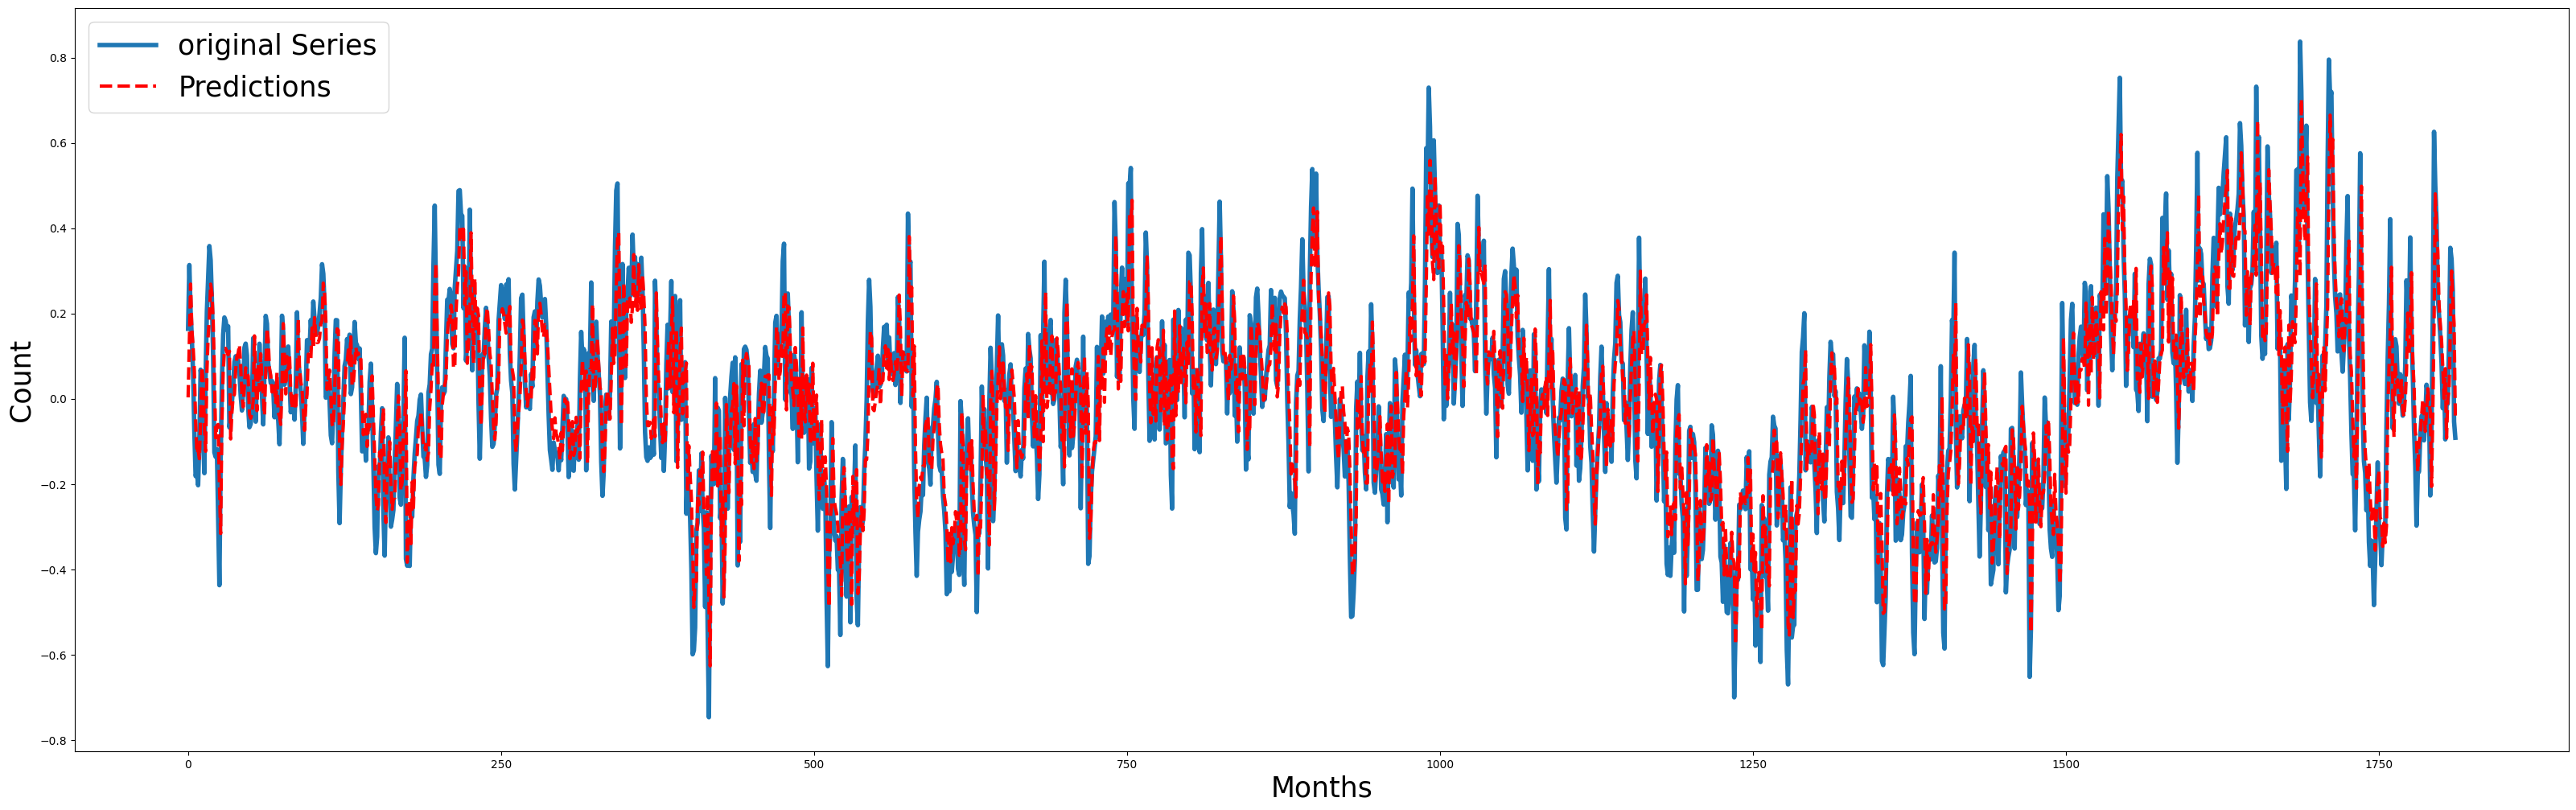

In [6]:
def plot_arima(data_values, order = (1,1,1), trend = 'c'):
    print('final model:', order, trend)
    model = ARIMA(data_values, order=order, trend = trend)
    results = model.fit()
    
    error = mean_squared_error(data_values, results.fittedvalues)   
    print('MSE error is:', error)
    
    from matplotlib import pyplot as plt
    f = plt.figure()
    f.set_figwidth(40)
    f.set_figheight(12)
    plt.plot(data_values, label = "original Series", linewidth = 4)
    plt.plot(results.fittedvalues, color='red', label = "Predictions", linestyle='dashed', linewidth = 3)
    plt.legend(fontsize = 25)
    plt.xlabel('Months', fontsize = 25)
    plt.ylabel('Count', fontsize = 25)
    plt.show()

print(results['best_params'])

order = (results['best_params']['p'], results['best_params']['d'], results['best_params']['q'])
plot_arima(data_values, order=order, trend = results['best_params']['trend'])